## Customer Segmentation

### Introduction:-
**Customer segmentation is the process of dividing customers into groups based on common characteristics so that companies can market to each group effectively and appropriately. Segmentation allows marketers to better tailor their marketing efforts to different categories of audiences. K-means clustering is effectively used to handle customer segmentation.**

### Dataset:-
The dataset consist of columns like **customer ID**, **gender of the customer**, **age of the customer**, **the annual income of the customer** given to us in thousand dollars and the **spending score** which ranges from **1 to 100**. from the **manager’s perspective**, a **good spending score** which is **close to 100** indicates a **good customer** and **spending score** close to **1** indicates a **bad customer.**

### Problem Statement:-
To **find** out the **potential customers for the manager** so that he can **call only** those specific **customers** and **roll out the offer** to them.

In [1]:
# K-Means Clustering

#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the file
df=pd.read_csv("Mall_Customers.csv", header=0,index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
print(df.shape) 
print(df.info())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [4]:
# Checking for missing Values
print(df.isnull().sum())
df.describe(include="all")

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [5]:
# No need for dealing with Missing value and Outliers

In [6]:
# Creating X
X = df.values[:,[2,3]]

In [7]:
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

C:\Users\Yesh Damania\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


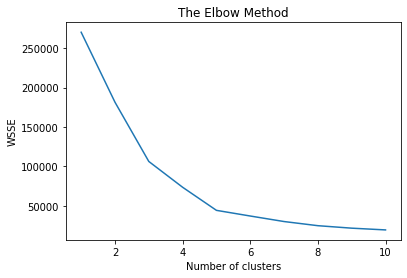

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [9]:
print(wsse) #Not Necessary for wsse printing.

[269981.28, 181363.595959596, 106348.3730621112, 73679.78903948834, 44448.45544793371, 37271.886236589504, 30273.39431207004, 25022.485004530354, 21881.878507060967, 19669.710998301216]


In [12]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5,  random_state = 10)
Y_pred = kmeans.fit_predict(X)   # Cluster will be formed  --> fit_predict --> using when you are confident k value

#kmeans.fit(X)-->training 
#Y_pred=kmeans.predict(X)-->predicting

In [13]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [14]:
kmeans.inertia_  # Inertia --> WSSE at each K

44448.45544793371

In [15]:
# How many iterations performed to reach the Zero Conversion State
kmeans.n_iter_

5

In [17]:
# Converting to labelled data
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


# Visualizing the K means Clustering 

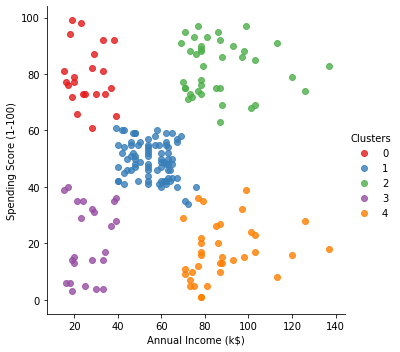

In [18]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#s = 300, c = 'black')
plt.show()

In [21]:
df["Clusters"]=df.Clusters.replace({0:"Careless",1:"Standard",2:"Target",3:"Sensible",4:"Careful"})

In [23]:
#pd.set_option("display.max_rows",None)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible


In [26]:
new_df=df[df["Clusters"]=="Target"]

In [27]:
new_df.shape

(39, 5)

In [28]:
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
124,Male,39,69,91,Target
126,Female,31,70,77,Target
128,Male,40,71,95,Target
130,Male,38,71,75,Target
132,Male,39,71,75,Target
134,Female,31,72,71,Target
136,Female,29,73,88,Target
138,Male,32,73,73,Target
140,Female,35,74,72,Target


In [29]:
new_df.to_excel("Target Customers.xlsx",index=True)

## Conclusion:-
    We have used K_means_Clustering Algorithm, used for Customer Segmentation and Finded the Potential Customers for manager
    We have got the Target Customers & send it to Client.